# Analysis of World Happiness 2020

> Final Project, required for DS 1.1: Data Analysis, Spring 2020

## Objectives

1. Identify the problem that needs data analysis and visualization
2. Provide data cleaning, data manipulation, and data visualization
3. Report statistics of dataset/Outlier detection, make comparison of samples among different groups,
and find correlation/Scatter plot
4. Communicate with comments and explanations of processes, analysis and interpretation of results





In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('WHR20_DataForFigure2.1.csv')

### Evaluate the dataframe

In [2]:
df.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [3]:
df.head

<bound method NDFrame.head of                  Country name  Regional indicator  Ladder score  \
0                     Finland      Western Europe        7.8087   
1                     Denmark      Western Europe        7.6456   
2                 Switzerland      Western Europe        7.5599   
3                     Iceland      Western Europe        7.5045   
4                      Norway      Western Europe        7.4880   
..                        ...                 ...           ...   
148  Central African Republic  Sub-Saharan Africa        3.4759   
149                    Rwanda  Sub-Saharan Africa        3.3123   
150                  Zimbabwe  Sub-Saharan Africa        3.2992   
151               South Sudan  Sub-Saharan Africa        2.8166   
152               Afghanistan          South Asia        2.5669   

     Standard error of ladder score  upperwhisker  lowerwhisker  \
0                          0.031156      7.869766      7.747634   
1                          0.03

In [5]:
US_happiness = df.loc[df['Country name'] == 'United States']
US_happiness.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
17,United States,North America and ANZ,6.9396,0.047316,7.03234,6.84686,10.925769,0.914219,68.2995,0.84262,0.149892,0.699715,1.972317,1.373987,1.404787,0.831618,0.534608,0.298143,0.152285,2.344125


In [21]:
happiness_by_region = df.loc[df['Regional indicator'] == 'North America and ANZ']
happiness_by_region.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
7,New Zealand,North America and ANZ,7.2996,0.039465,7.376953,7.222248,10.500943,0.949119,73.202629,0.936217,0.191598,0.221139,1.972317,1.242318,1.487218,1.008138,0.646790,0.325726,0.461268,2.128108
10,Canada,North America and ANZ,7.2321,0.040405,7.311295,7.152905,10.692369,0.927177,73.601601,0.933913,0.124771,0.390843,1.972317,1.301648,1.435392,1.022502,0.644028,0.281529,0.351702,2.195269
11,Australia,North America and ANZ,7.2228,0.041841,7.304808,7.140791,10.720596,0.944855,73.604538,0.915432,0.190460,0.415169,1.972317,1.310396,1.477146,1.022608,0.621877,0.324974,0.335996,2.129804
17,United States,North America and ANZ,6.9396,0.047316,7.032340,6.846860,10.925769,0.914219,68.299500,0.842620,0.149892,0.699715,1.972317,1.373987,1.404787,0.831618,0.534608,0.298143,0.152285,2.344125


In [9]:
df.iloc[0]

Country name                                         Finland
Regional indicator                            Western Europe
Ladder score                                          7.8087
Standard error of ladder score                     0.0311563
upperwhisker                                         7.86977
lowerwhisker                                         7.74763
Logged GDP per capita                                10.6393
Social support                                       0.95433
Healthy life expectancy                              71.9008
Freedom to make life choices                        0.949172
Generosity                                         -0.059482
Perceptions of corruption                           0.195445
Ladder score in Dystopia                             1.97232
Explained by: Log GDP per capita                     1.28519
Explained by: Social support                         1.49953
Explained by: Healthy life expectancy               0.961271
Explained by: Freedom to

### There are ten unique Regional indicators and 153 unique Country names

In [10]:
df.describe(include='O')

,Country name,Regional indicator
count,153,153
unique,153,10
top,Brazil,Sub-Saharan Africa
freq,1,39


### Number of records for each region

In [28]:
df['Regional indicator'].value_counts()

# dataset contains no NaN values and does not require cleaning

Sub-Saharan Africa                    39
Latin America and Caribbean           21
Western Europe                        21
Central and Eastern Europe            17
Middle East and North Africa          17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Regional indicator, dtype: int64

### Amount of data available per region

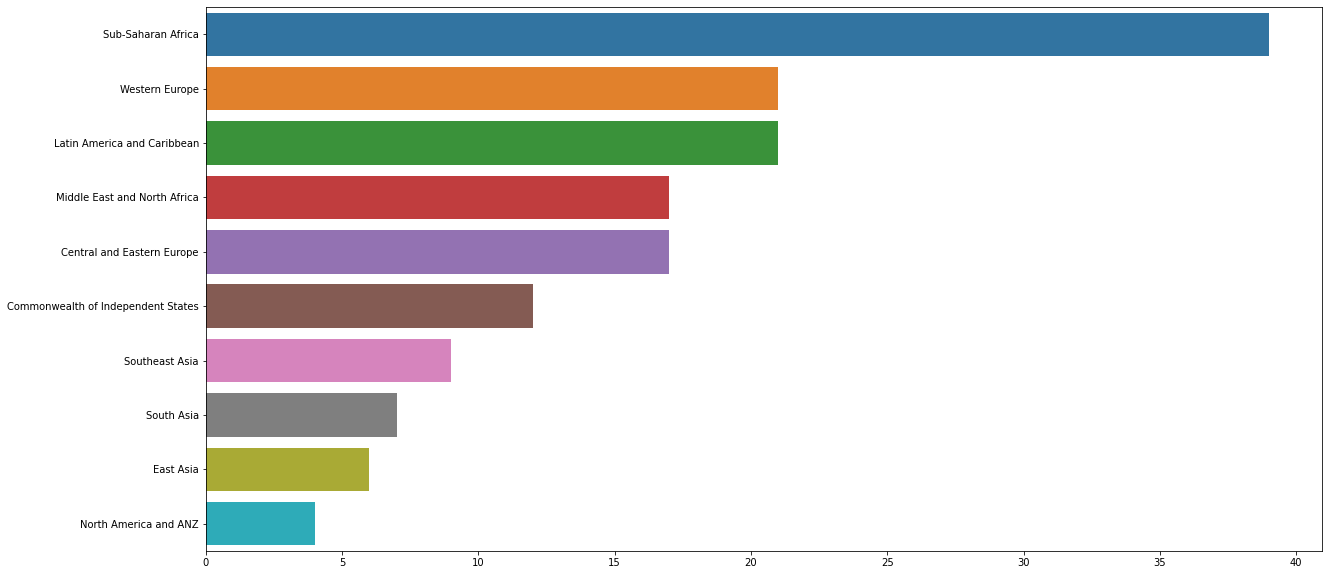

In [40]:
regions = df["Regional indicator"].value_counts()
regions.sort_values(ascending=False, inplace=True)


plt.subplots(figsize=(20,10))

sns.barplot(x=regions.values, y=regions.index, order=regions.index, orient="h")

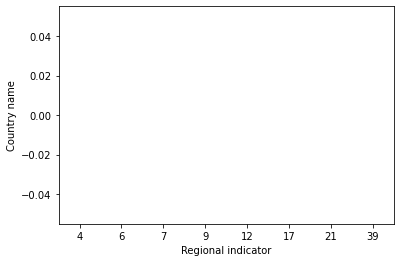

In [35]:
countries = df["Country name"].value_counts()
sns.barplot(x=regions, y=countries)

In [50]:
pd.crosstab(df['Regional indicator'], df['Ladder score'])

Ladder score,2.5669,2.8166,3.2992,3.3123,3.4759,3.4762,3.4789,3.5274,3.5380,3.5733,...,7.2375,7.2942,7.2996,7.3535,7.4489,7.4880,7.5045,7.5599,7.6456,7.8087
Regional indicator,,,,,,,,,,,,,,,,,,,,,
Central and Eastern Europe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Commonwealth of Independent States,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
East Asia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Latin America and Caribbean,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Middle East and North Africa,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
North America and ANZ,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
South Asia,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Southeast Asia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sub-Saharan Africa,0,1,1,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


([<matplotlib.patches.Wedge at 0x129581dd0>,
 [Text(0.7657473043154236, 0.7897031505152187, 'Sub-Saharan Africa'),
  Text(-0.49031230252732855, 0.9846795651329165, 'Western Europe'),
  Text(-1.0667766712597773, 0.268304926633689, 'Latin America and Caribbean'),
  Text(-0.9469310848572637, -0.5597513023933448, 'Middle East and North Africa'),
  Text(-0.3655900884908006, -1.0374699452019267, 'Central and Eastern Europe'),
  Text(0.27924318194629744, -1.0639658102291196, 'Commonwealth of Independent States'),
  Text(0.6983782581777012, -0.8498634057921781, 'Southeast Asia'),
  Text(0.9352389700947302, -0.5790751840790178, 'South Asia'),
  Text(1.0548620104022655, -0.31187519781170614, 'East Asia'),
  Text(1.0962918861357278, -0.09024466960972555, 'North America and ANZ')])

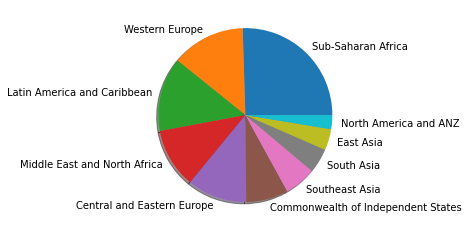

In [111]:
df.dropna()

LABELS = regions.keys()

plt.pie(regions.values, labels=LABELS, shadow=True)

In [109]:
print(regions)

Sub-Saharan Africa                    39
Western Europe                        21
Latin America and Caribbean           21
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Regional indicator, dtype: int64


## Average Happiness of the World

In [42]:
df['Ladder score'].mean()


5.473239862849674

On a scale of one to ten, the avarage happiness score for the world is approximately 5.5.

## Questions

Where (Region, Country) are the highest happiness scores in the world found?<br>
Where (Region, Country) are the highest happiness scores in the world found?<br>
What are the contributing factors to happiness in specific regions? Countries?<br>
Could happiness scores in low-scoring areas be improved by changing the contributing factors?
<hr>

Discontent    85
Content       53
Unhappy       15
Name: Catagory, dtype: int64

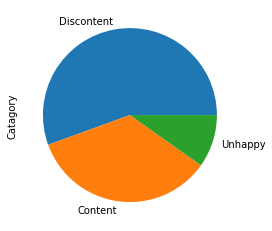

In [116]:
def sort_scores(score):
        if score >= 8:
            return 'Happy'
        elif score >= 6 and score <=8:
            return 'Content'
        elif score >=4 and score <= 6:
            return 'Discontent'
        elif score >= 0 and score <= 4:
            return 'Unhappy'

        
df["Catagory"] = df['Ladder score'].apply(sort_scores)

df['Catagory'].value_counts().plot(kind='pie')
df['Catagory'].value_counts()

> !

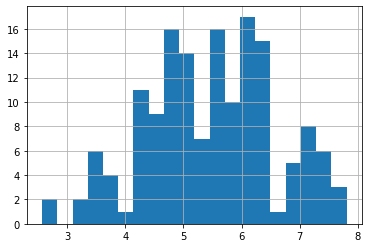

In [62]:
df['Ladder score'].hist(bins=20)

## The output below shows us something of interest. No participating country or region rated themselves as actually 'Happy', as it's been defined in this analysis

In [68]:
df['Ladder score'].unique()

array([7.80870008, 7.64559984, 7.55989981, 7.50449991, 7.48799992,
       7.44890022, 7.35349989, 7.29960012, 7.29419994, 7.23750019,
       7.23210001, 7.22279978, 7.16450024, 7.12860012, 7.12139988,
       7.09369993, 7.07579994, 6.93959999, 6.91090012, 6.86350012,
       6.79080009, 6.77279997, 6.66379976, 6.46500015, 6.45539999,
       6.44010019, 6.40649986, 6.40089989, 6.39890003, 6.38740015,
       6.37709999, 6.37559986, 6.36339998, 6.34829998, 6.32520008,
       6.30480003, 6.28060007, 6.25759983, 6.22849989, 6.22730017,
       6.21549988, 6.19189978, 6.1862998 , 6.16340017, 6.15899992,
       6.13710022, 6.12370014, 6.1020999 , 6.10129976, 6.05789995,
       6.02180004, 6.00600004, 6.00040007, 5.9987998 , 5.97469997,
       5.95319986, 5.94999981, 5.92519999, 5.91090012, 5.88980007,
       5.87239981, 5.87080002, 5.79680014, 5.77820015, 5.74749994,
       5.69329977, 5.69210005, 5.68919992, 5.67409992, 5.60750008,
       5.55569982, 5.54610014, 5.546     , 5.54150009, 5.53989

In [69]:
print(len(df['Ladder score'].unique()))

153


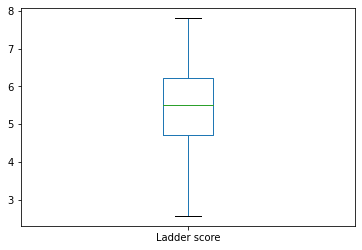

In [70]:
df['Ladder score'].plot.box()

# no outliers

## Analysis of overall happiness in relation to freedom to make life choices, by region.

Regional indicator
Latin America and Caribbean     AxesSubplot(0.125,0.125;0.775x0.755)
Middle East and North Africa    AxesSubplot(0.125,0.125;0.775x0.755)
South Asia                      AxesSubplot(0.125,0.125;0.775x0.755)
Sub-Saharan Africa              AxesSubplot(0.125,0.125;0.775x0.755)
Name: Freedom to make life choices, dtype: object

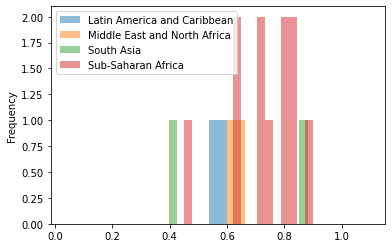

In [81]:
df[df['Ladder score'] <= 4].groupby('Regional indicator')['Freedom to make life choices'].plot(bins=16, kind='hist', legend=True, alpha=0.5)

from the above analysis we can see that most of the scores that can be classified as 'Unhappy', are in four regions
>Latin America and Caribbean<br>
>Middle East and North Africa<br>
>South Asia<br>
>Sub-Saharan Africa<br>

with Sub-Saharan Africa being only slightly less unhappy, despite rating their 'Freedom to make life choices' in the 'Content' or 'Happy' range


Regional indicator
Central and Eastern Europe            AxesSubplot(0.125,0.125;0.775x0.755)
Commonwealth of Independent States    AxesSubplot(0.125,0.125;0.775x0.755)
East Asia                             AxesSubplot(0.125,0.125;0.775x0.755)
Latin America and Caribbean           AxesSubplot(0.125,0.125;0.775x0.755)
Middle East and North Africa          AxesSubplot(0.125,0.125;0.775x0.755)
North America and ANZ                 AxesSubplot(0.125,0.125;0.775x0.755)
Southeast Asia                        AxesSubplot(0.125,0.125;0.775x0.755)
Sub-Saharan Africa                    AxesSubplot(0.125,0.125;0.775x0.755)
Western Europe                        AxesSubplot(0.125,0.125;0.775x0.755)
Name: Freedom to make life choices, dtype: object

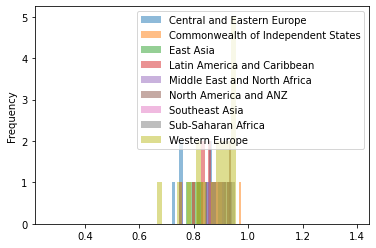

In [83]:
df[df['Ladder score'] >= 6].groupby('Regional indicator')['Freedom to make life choices'].plot(bins=16, kind='hist', legend=True, alpha=0.5)

Of those regions who rate themselves as 'Content', as defined by this analysis, Western Europe shows the highest correlation between happiness and freedom to make life choices

ValueError: 'label' must be of length 'x'

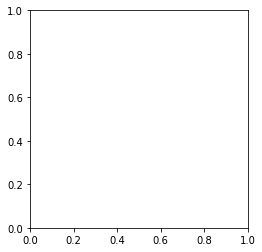

In [89]:
plt.pie(df['Freedom to make life choices'], labels=df.groupby(['Regional indicator']), shadow=True)

## Top 10 highest rated for freedom to make life choices

In [106]:
df.groupby(['Freedom to make life choices'])
df[:10]

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
5,Netherlands,Western Europe,7.4489,0.027792,7.503372,7.394428,10.812712,0.939139,72.300919,0.908548,0.207612,0.364717,1.972317,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570,2.352117
6,Sweden,Western Europe,7.3535,0.036234,7.424519,7.282481,10.758794,0.926311,72.600769,0.939144,0.111615,0.250880,1.972317,1.322235,1.433348,0.986470,0.650298,0.272828,0.442066,2.246299
7,New Zealand,North America and ANZ,7.2996,0.039465,7.376953,7.222248,10.500943,0.949119,73.202629,0.936217,0.191598,0.221139,1.972317,1.242318,1.487218,1.008138,0.646790,0.325726,0.461268,2.128108
8,Austria,Western Europe,7.2942,0.033365,7.359596,7.228804,10.742824,0.928046,73.002502,0.899989,0.085429,0.499955,1.972317,1.317286,1.437445,1.000934,0.603369,0.255510,0.281256,2.398446
9,Luxembourg,Western Europe,7.2375,0.030852,7.297970,7.177031,11.450681,0.906912,72.599998,0.905636,-0.004621,0.367084,1.972317,1.536676,1.387528,0.986443,0.610137,0.195954,0.367041,2.153700


### 90% of top 10 are in the Western Europe region

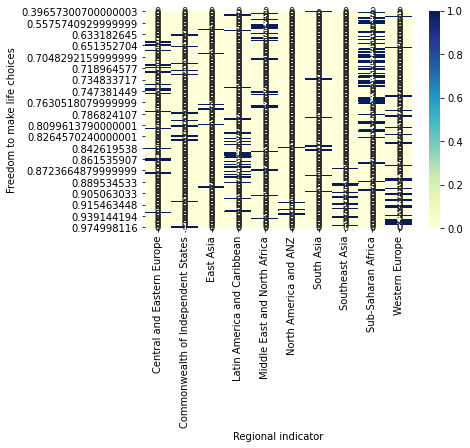

In [99]:
sns.heatmap(pd.crosstab(df['Freedom to make life choices'], df['Regional indicator'], normalize='index'), cmap="YlGnBu", annot=True)

In [103]:
df[(df['Ladder score']>=6)]['Freedom to make life choices']

0     0.949172
1     0.951444
2     0.921337
3     0.948892
4     0.955750
5     0.908548
6     0.939144
7     0.936217
8     0.899989
9     0.905636
10    0.933913
11    0.915432
12    0.834744
13    0.747581
14    0.934739
15    0.886983
16    0.867371
17    0.842620
18    0.818537
19    0.813582
20    0.941346
21    0.924911
22    0.825468
23    0.858709
24    0.771530
25    0.892395
26    0.854191
27    0.751990
28    0.908148
29    0.664652
30    0.926645
31    0.799805
32    0.936143
33    0.833805
34    0.861536
35    0.880367
36    0.749953
37    0.974998
38    0.744896
39    0.905856
40    0.747381
41    0.857907
42    0.862056
43    0.836180
44    0.779858
45    0.863903
46    0.842823
47    0.872366
48    0.889535
49    0.811602
50    0.877709
51    0.915463
52    0.718965
Name: Freedom to make life choices, dtype: float64

In [107]:
pd.crosstab(df['Freedom to make life choices'], df['Regional indicator'], normalize='index')

Regional indicator,Central and Eastern Europe,Commonwealth of Independent States,East Asia,Latin America and Caribbean,Middle East and North Africa,North America and ANZ,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Freedom to make life choices,,,,,,,,,,
0.396573,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0.451314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0.466611,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0.537825,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0.541345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
0.949172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0.951444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0.955750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


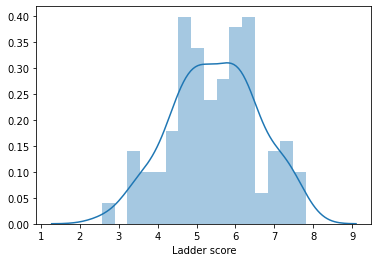

In [108]:
sns.distplot(df['Ladder score'].dropna(), hist=True, kde=True, bins=16)